In [200]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from matplotlib.pyplot import xticks
%matplotlib inline

In [201]:
#importing the dataset for analysis and model building
df_ls=pd.read_csv("Leads.csv")

In [202]:
#Get dimensions of the dataset
df_ls.shape

(9240, 37)

In [203]:
#Observe the data types of the features
df_ls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

## Data Pre-processing

In [204]:
#Check for columns having missing values greater than 40% and drop them
((df_ls.isnull().sum()/9240)*100)

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [205]:
li=list(df_ls.columns.values)
li1=[]
for i in li:
    if ((df_ls[i].isnull().sum()*100)/df_ls.shape[0])>40:
        li1.append(i)
print(li1)

['Lead Quality', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score']


In [206]:
df_ls.drop(['Lead Quality', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 
            'Asymmetrique Activity Score', 'Asymmetrique Profile Score'],axis=1,inplace=True)

In [207]:
df_ls.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [208]:
#Replace mssing values under Lead Source with modt frequent value
ss=df_ls['Lead Source'].mode()[0]
df_ls['Lead Source']

0           Olark Chat
1       Organic Search
2       Direct Traffic
3       Direct Traffic
4               Google
             ...      
9235    Direct Traffic
9236    Direct Traffic
9237    Direct Traffic
9238            Google
9239    Direct Traffic
Name: Lead Source, Length: 9240, dtype: object

In [209]:
df_ls['Lead Source'].fillna(ss,inplace=True)


In [210]:
#Make redundant categories as one
df_ls['Lead Source']=df_ls['Lead Source'].str.replace('google','Google')

In [211]:
#Make redundant categories as one
df_ls['Lead Source']=df_ls['Lead Source'].str.replace('welearnblog_Home','WeLearn')

In [212]:
#Replace missing values under Total Visits with median
tv=df_ls.TotalVisits.median()

In [213]:
df_ls.TotalVisits.fillna(tv,inplace=True)

In [214]:
df_ls.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                         0
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                         0
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [215]:
#Replace missing values under Page Views Per Visit with median
pv=df_ls['Page Views Per Visit'].median()

In [216]:
df_ls['Page Views Per Visit'].fillna(pv,inplace=True)

In [217]:
#Replace missing values under Last Activity with most frequent value
la=df_ls['Last Activity'].mode()[0]

In [218]:
df_ls['Last Activity'].fillna(la,inplace=True)

In [219]:
c=df_ls['Country'].mode()[0]

In [220]:
df_ls['Country'].fillna(c,inplace=True)

In [221]:
df_ls['Specialization'].value_counts()

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [222]:
#Replacing Select category with Unknown
df_ls['Specialization']=df_ls['Specialization'].str.replace('Select','Unknown')

In [223]:
s=df_ls['Specialization'].mode()[0]

In [224]:
df_ls['Specialization'].fillna(s,inplace=True)

In [225]:
df_ls['How did you hear about X Education'].value_counts()

Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

In [226]:
#Here most leads come through online search. So, replacing Select category 
#by next frequent category 'online search'
df_ls['How did you hear about X Education']=df_ls['How did you hear about X Education'].str.replace('Select','Online Search')

In [227]:
xe=df_ls['How did you hear about X Education'].mode()[0]

In [228]:
df_ls['How did you hear about X Education'].fillna(xe,inplace=True)

In [229]:
df_ls['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [230]:
co=df_ls['What is your current occupation'].mode()[0]

In [231]:
df_ls['What is your current occupation'].fillna(co,inplace=True)

In [232]:
df_ls['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [233]:
cc=df_ls['What matters most to you in choosing a course'].mode()[0]

In [234]:
df_ls['What matters most to you in choosing a course'].fillna(cc,inplace=True)

In [235]:
df_ls['Tags'].value_counts()

Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

In [236]:
t=df_ls['Tags'].mode()[0]

In [237]:
df_ls['Tags'].fillna(t,inplace=True)

In [238]:
df_ls['Lead Profile'].value_counts()  

Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [239]:
#As lead profile is of importance to not waste time on unnecessary calls, 'select' category can be treated as
#a special category where the lead profile is neutral
#So lets replace the missing values with select itself

lp=df_ls['Lead Profile'].mode()[0]

In [240]:
df_ls['Lead Profile'].fillna(lp,inplace=True)

In [241]:
#Lets replace 'Select' category with 'Neutral' to make it more meaningful
df_ls['Lead Profile']=df_ls['Lead Profile'].str.replace('Select','Neutral')

In [242]:
df_ls['City'].value_counts()

Mumbai                         3222
Select                         2249
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [243]:
df_ls['City']=df_ls['City'].str.replace('Select','Unknown')

In [244]:
cy=df_ls['City'].mode()[0]

In [245]:
df_ls['City'].fillna(cy,inplace=True)

In [246]:
#Prospect ID and Lead Number serve the same purpose. So dropping the Prospect ID with complex pattern
df_ls.drop(['Prospect ID'],axis=1,inplace=True)

### Dropping biased columns having same value throughout

#### If any column in the dataset is having the same values, we can drop that column as it will not help to differentiate between two different labels while on the other hand, it can even negatively affect the model by imposing a bias in the data.

In [247]:
df_ls['Magazine'].value_counts()

No    9240
Name: Magazine, dtype: int64

In [248]:
df_ls['Receive More Updates About Our Courses'].value_counts()

No    9240
Name: Receive More Updates About Our Courses, dtype: int64

In [249]:
df_ls['Update me on Supply Chain Content'].value_counts()

No    9240
Name: Update me on Supply Chain Content, dtype: int64

In [250]:
df_ls['Get updates on DM Content'].value_counts()

No    9240
Name: Get updates on DM Content, dtype: int64

In [251]:
df_ls['I agree to pay the amount through cheque'].value_counts()

No    9240
Name: I agree to pay the amount through cheque, dtype: int64

In [252]:
df_ls.drop(['Magazine','Receive More Updates About Our Courses','Update me on Supply Chain Content',
           'Get updates on DM Content','I agree to pay the amount through cheque'],axis=1,inplace=True)

In [253]:
#All the null values have been treated

df_ls.isnull().sum()

Lead Number                                      0
Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
Country                                          0
Specialization                                   0
How did you hear about X Education               0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Newspaper Article                                0
X Education Forums                               0
Newspaper                                        0
Digital Advertisement          

In [254]:
df_ls.shape

(9240, 26)

# EDA

## Univariate and Bi-Variate Analysis

In [255]:
df_ls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 26 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Number                                    9240 non-null   int64  
 1   Lead Origin                                    9240 non-null   object 
 2   Lead Source                                    9240 non-null   object 
 3   Do Not Email                                   9240 non-null   object 
 4   Do Not Call                                    9240 non-null   object 
 5   Converted                                      9240 non-null   int64  
 6   TotalVisits                                    9240 non-null   float64
 7   Total Time Spent on Website                    9240 non-null   int64  
 8   Page Views Per Visit                           9240 non-null   float64
 9   Last Activity                                  9240 

In [256]:
df_ls.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000
mean,617188.435606,0.385390,3.438636,487.698268,2.357440
std,23405.995698,0.486714,4.819024,548.021466,2.145781
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000


In [257]:
df_ls.corr()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
Lead Number,1.000000,0.025157,0.021366,0.020329,0.057042
Converted,0.025157,1.000000,0.029119,0.362483,-0.005068
TotalVisits,0.021366,0.029119,1.000000,0.217341,0.512214
Total Time Spent on Website,0.020329,0.362483,0.217341,1.000000,0.314266
Page Views Per Visit,0.057042,-0.005068,0.512214,0.314266,1.000000


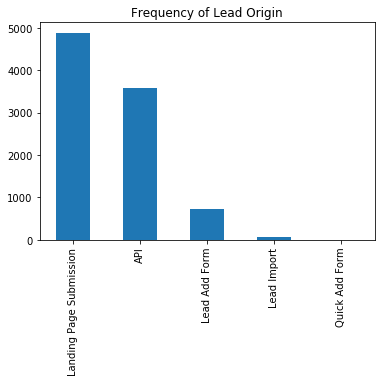

In [258]:
#Frequency of lead Origin
df_ls['Lead Origin'].value_counts().plot.bar()
plt.title("Frequency of Lead Origin")
plt.show()
#Observation: More leads are from landing page submission

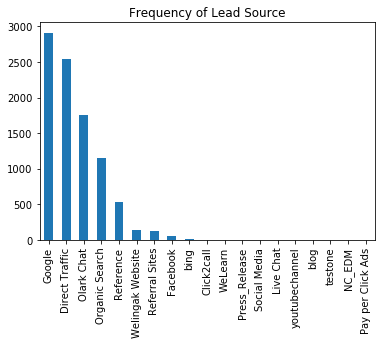

In [259]:
#Frequency of lead Source
df_ls['Lead Source'].value_counts().plot.bar()
plt.title("Frequency of Lead Source")
plt.show()
#Observation: Google is the top most lead source

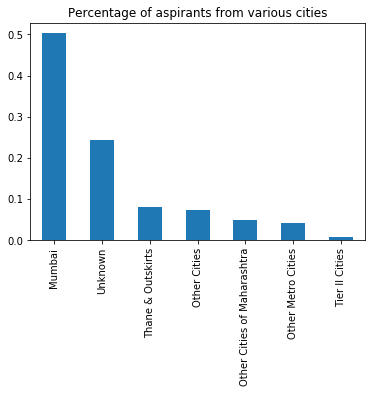

In [260]:
#Percentage of aspirants from various cities
df_ls['City'].value_counts(normalize=True).plot.bar()
plt.title("Percentage of aspirants from various cities")
plt.show()
#Observation: Most of the leads are from Mumbai

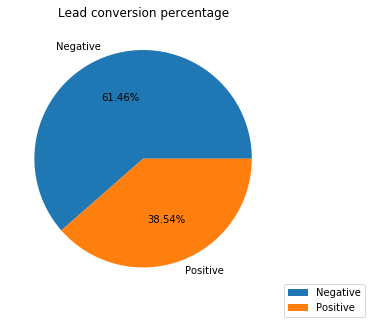

In [261]:
#Analysis of lead conversion class balance
plt.figure(figsize=(5,5))
lab=['Negative', 'Positive']
plt.title("Lead conversion percentage")
df_ls.groupby(['Converted'])['Lead Number'].count().plot.pie(labels=lab,autopct='%1.2f%%')
plt.ylabel("")
plt.legend(loc="lower left",bbox_to_anchor=(1,-0.10))
plt.show()
#Observation: There is only 38.54% lead conversion

## Visualization of various channels of enquiry by leads

In [262]:
#Getting the number of lead enquiries through various channels
li=['Search', 'Newspaper Article', 'X Education Forums', 'Newspaper',
    'Digital Advertisement', 'Through Recommendations']
li1=[]
for i in li:
    li1.append(df_ls[i].value_counts()[1])
li1

[14, 2, 1, 1, 4, 7]

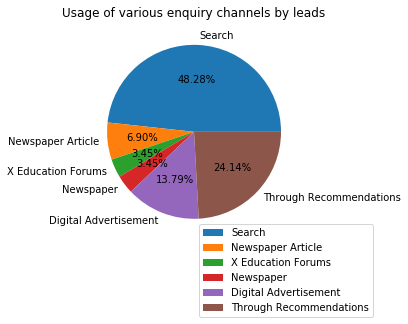

In [263]:
#Distribution of lead enquiries through various channels
lab=['Search', 'Newspaper Article', 'X Education Forums', 'Newspaper',
    'Digital Advertisement', 'Through Recommendations']
plt.title("Usage of various enquiry channels by leads")
plt.pie(li1,labels=lab,autopct='%1.2f%%')
plt.ylabel("")
plt.legend(loc="upper left",bbox_to_anchor=(0.5,0.10))
plt.show()
#Observation: 'Search' followed by 'Recommendations' and 'Digital Advertisement' 
#works out to be better channels for the leads

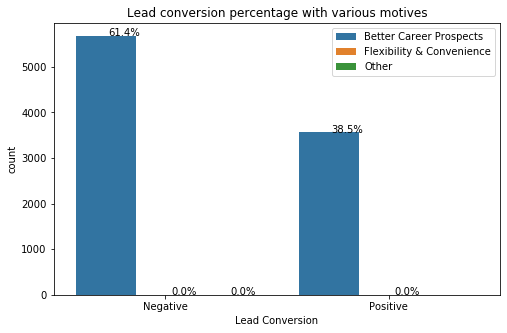

In [264]:
#Lead conversion percentage with various motives
plt.figure(figsize=(8,5))
ax=sns.countplot(data=df_ls,x='Converted',hue='What matters most to you in choosing a course')
plt.title("Lead conversion percentage with various motives")

plt.xlabel('Lead Conversion')
x=[0,1]
labels=['Negative','Positive']
plt.xticks(x,labels)
plt.legend(loc="upper right")
total=df_ls.shape[0]

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x()-0.05 + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
    
plt.show()
#Observation: All the leads landed with a motive to achieve better career prospects

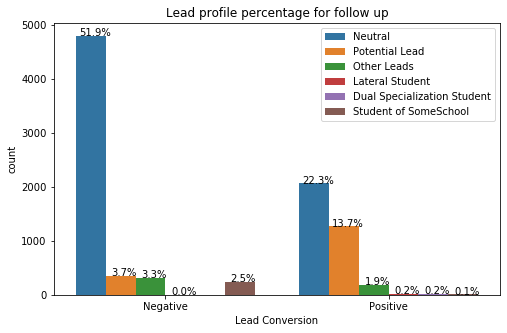

In [265]:
#Lead profile percentage 
plt.figure(figsize=(8,5))
ax=sns.countplot(data=df_ls,x='Converted',hue='Lead Profile')
plt.title("Lead profile percentage for follow up")

plt.xlabel('Lead Conversion')
x=[0,1]
labels=['Negative','Positive']
plt.xticks(x,labels)
plt.legend(loc="upper right")
total=df_ls.shape[0]

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x()-0.05 + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
    
plt.show()
#Observation: There are 22.3% leads with neutral attitude and 13.7% leads that are 
#potential leads who actually converted to be positive leads

## Outlier analysis

In [266]:
df_ls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 26 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Number                                    9240 non-null   int64  
 1   Lead Origin                                    9240 non-null   object 
 2   Lead Source                                    9240 non-null   object 
 3   Do Not Email                                   9240 non-null   object 
 4   Do Not Call                                    9240 non-null   object 
 5   Converted                                      9240 non-null   int64  
 6   TotalVisits                                    9240 non-null   float64
 7   Total Time Spent on Website                    9240 non-null   int64  
 8   Page Views Per Visit                           9240 non-null   float64
 9   Last Activity                                  9240 

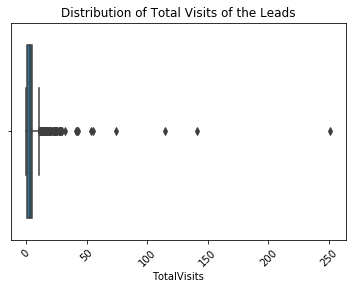

In [267]:
#Distribution of Total visits of the leads 
sns.boxplot(df_ls['TotalVisits'])
plt.xticks(rotation=45)
plt.title("Distribution of Total Visits of the Leads")
plt.show()
#Observation: There are outliers in total visits of the leads, scaling required.

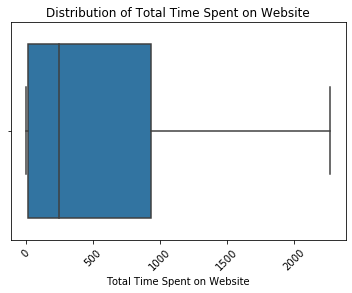

In [268]:
#Distribution of Total time spent by leads on the website 
sns.boxplot(df_ls['Total Time Spent on Website'])
plt.xticks(rotation=45)
plt.title("Distribution of Total Time Spent on Website")
plt.show()
#Observation: The median of the total time spent is musch lesser than 
#the maximum value, scaling required

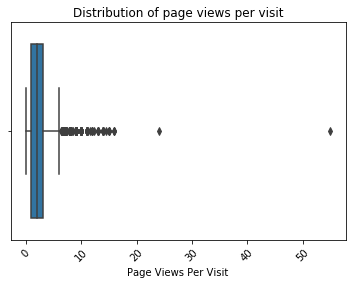

In [269]:
#Distribution of Page views per visit by leads 
sns.boxplot(df_ls['Page Views Per Visit'])
plt.xticks(rotation=45)
plt.title("Distribution of page views per visit")
plt.show()
#Observation: There are outliers in page views per visit by leads, scaling required.

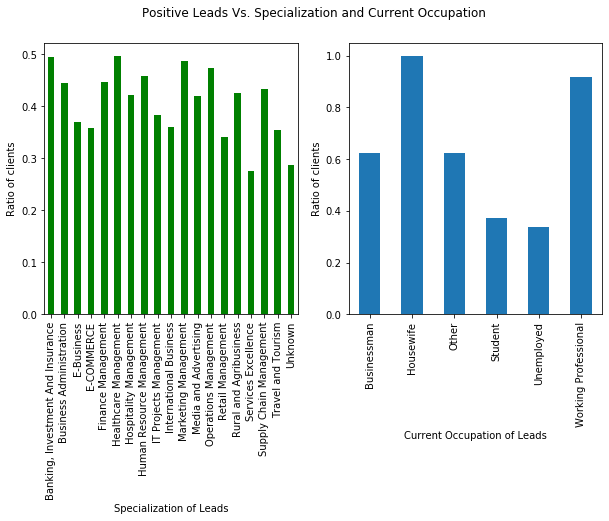

In [272]:
#Positive Leads Vs. their Specialization and Current Occupation
plt.figure(figsize=(10,5))
plt.suptitle("Positive Leads Vs. Specialization and Current Occupation")
plt.subplot(1,2,1)
df_ls.groupby(['Specialization'])['Converted'].mean().plot.bar(color='Green')
plt.xlabel('Specialization of Leads')
plt.ylabel("Ratio of clients")
plt.subplot(1,2,2)
df_ls.groupby(['What is your current occupation'])['Converted'].mean().plot.bar()
plt.xlabel('Current Occupation of Leads')
plt.ylabel("Ratio of clients")
plt.show()
#Observation: Most of the leads are from banking and insurance, and healthcare management domains
#Most of them are currently working professionals and housewives

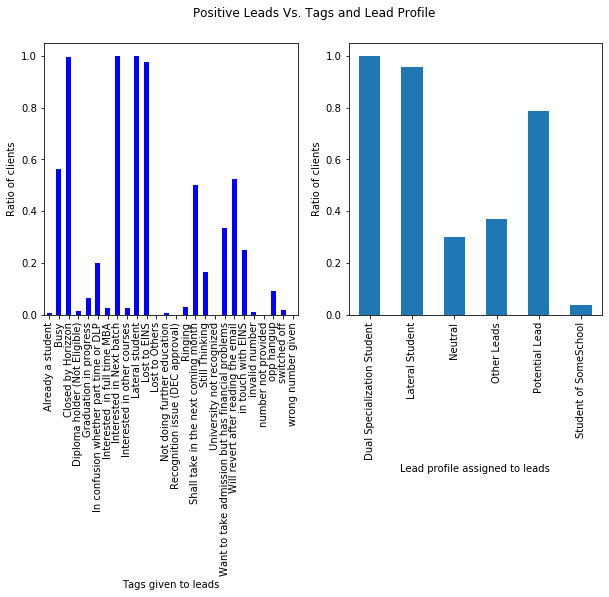

In [273]:
#Positive Leads Vs. their tags and lead profiles assigned
plt.figure(figsize=(10,5))
plt.suptitle("Positive Leads Vs. Tags and Lead Profile")
plt.subplot(1,2,1)
df_ls.groupby(['Tags'])['Converted'].mean().plot.bar(color='Blue')
plt.xlabel('Tags given to leads')
plt.ylabel("Ratio of clients")
plt.subplot(1,2,2)
df_ls.groupby(['Lead Profile'])['Converted'].mean().plot.bar()
plt.xlabel('Lead profile assigned to leads')
plt.ylabel("Ratio of clients")
plt.show()
#Observation:Interested in next batch and lateral students are the tags frequently given
#Dual specialization and lateral student are the top lead profiles

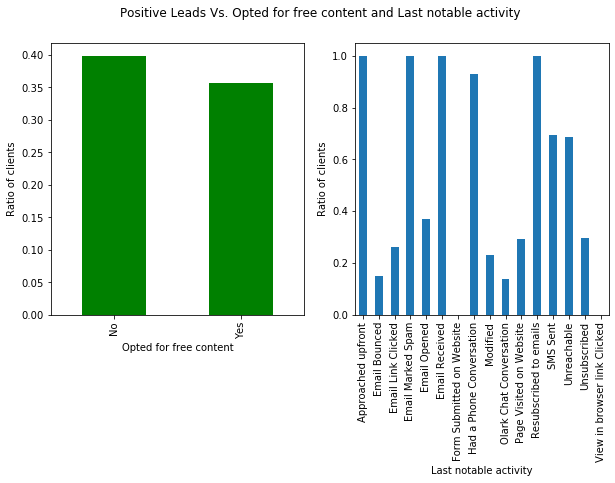

In [274]:
#Positive Leads Vs. their Opted for free content and last notable activity
plt.figure(figsize=(10,5))
plt.suptitle("Positive Leads Vs. Opted for free content and Last notable activity")
plt.subplot(1,2,1)
df_ls.groupby(['A free copy of Mastering The Interview'])['Converted'].mean().plot.bar(color='Green')
plt.xlabel('Opted for free content')
plt.ylabel("Ratio of clients")
plt.subplot(1,2,2)
df_ls.groupby(['Last Notable Activity'])['Converted'].mean().plot.bar()
plt.xlabel('Last notable activity')
plt.ylabel("Ratio of clients")
plt.show()
#Observation:Most of the positive leads didn't opt for free content
#Approached upfront and resubscribed to emails are some among the frequent last notable activities

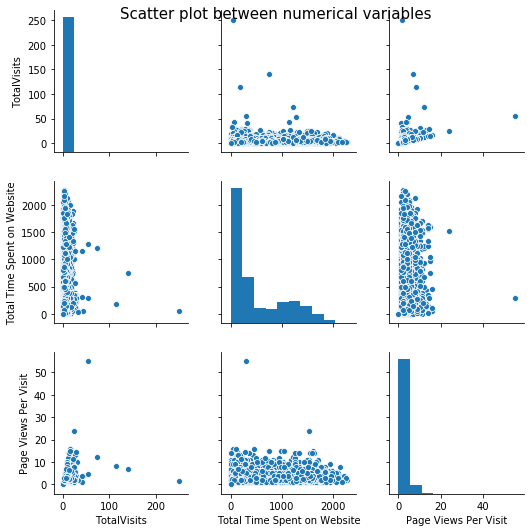

In [275]:
#Scatter plots to understand the correlation between the numerical variables
sns.pairplot(data=df_ls,vars=['TotalVisits','Total Time Spent on Website','Page Views Per Visit'])
plt.suptitle("Scatter plot between numerical variables",size=15)                                   
plt.show()
#Observation: There is no much correlation between the numerical variables

### Correlation between categorical features

In [76]:
#To know the percentage of positive leads to align the center of the heatmap
df_ls['Converted'].sum()*100/df_ls.shape[0]

38.53896103896104

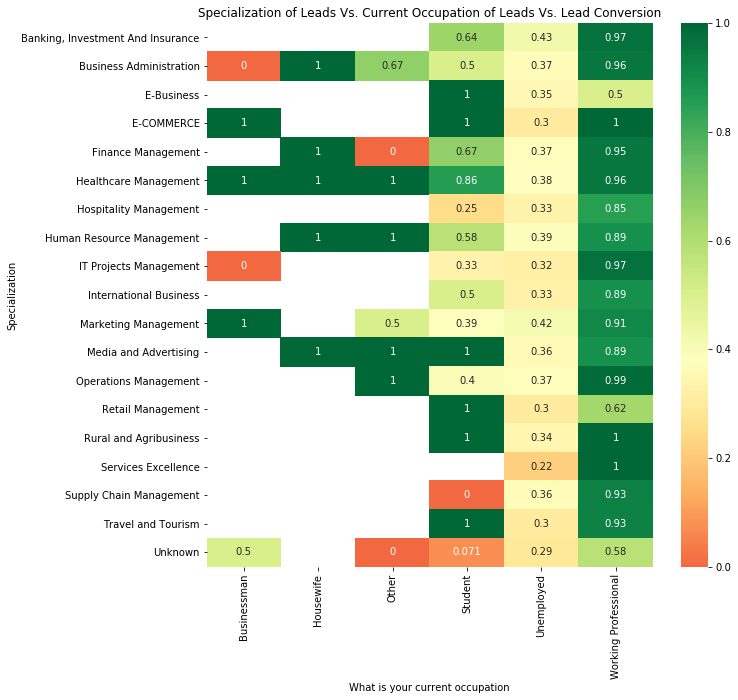

In [77]:
#Specialization of leads Vs. Current Occupation Vs. Lead Conversion
plt.figure(figsize=(10,10))
plt.title("Specialization of Leads Vs. Current Occupation of Leads Vs. Lead Conversion")
res=pd.pivot_table(data=df_ls,index='Specialization',columns='What is your current occupation',values='Converted')
sns.heatmap(res,annot=True,center=0.38,cmap='RdYlGn')
plt.show()
#Observation: Most of the working professionals from management domain were among the
#positive leads

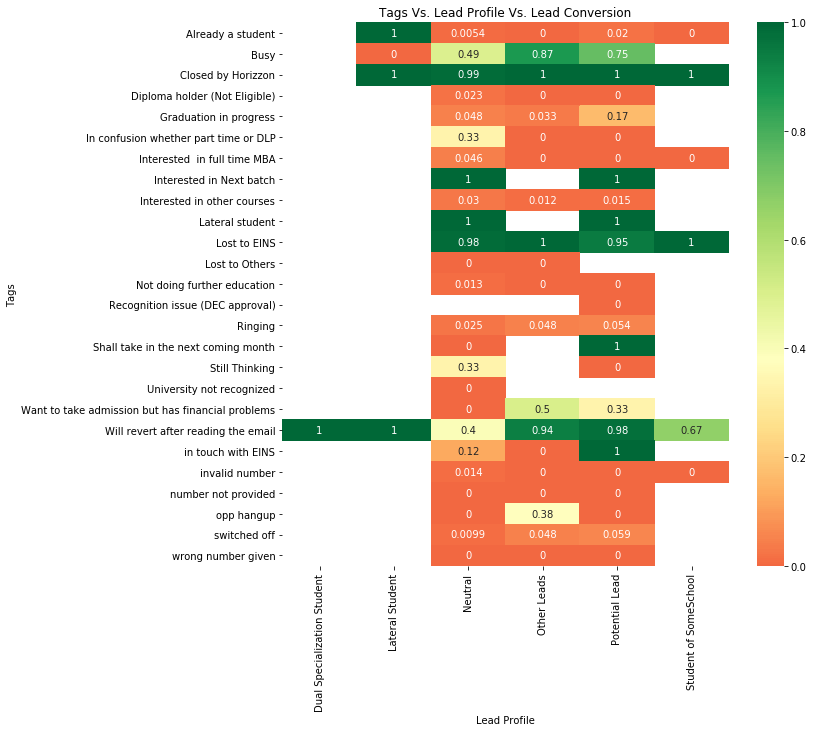

In [78]:
#Tags of leads Vs. Lead Profile Vs. Lead Conversion
plt.figure(figsize=(10,10))
plt.title("Tags Vs. Lead Profile Vs. Lead Conversion")
res=pd.pivot_table(data=df_ls,index='Tags',columns='Lead Profile',values='Converted')
sns.heatmap(res,annot=True,center=0.38,cmap='RdYlGn')
plt.show()
#Observation: Leads who responded positively indicating they shall revert converted 
#to positive leads

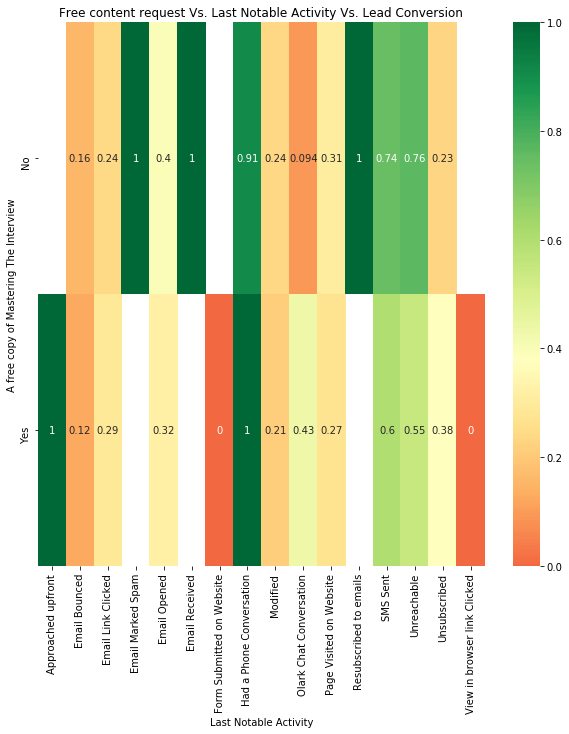

In [79]:
#Free content request Vs. Last Notable Activity Vs. Lead Conversion
plt.figure(figsize=(10,10))
plt.title("Free content request Vs. Last Notable Activity Vs. Lead Conversion")
res=pd.pivot_table(data=df_ls,index='A free copy of Mastering The Interview',columns='Last Notable Activity',values='Converted')
sns.heatmap(res,annot=True,center=0.38,cmap='RdYlGn')
plt.show()
#Observation: Having phone conversation had a positive impact on lead conversion

In [80]:
df_ls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 26 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Number                                    9240 non-null   int64  
 1   Lead Origin                                    9240 non-null   object 
 2   Lead Source                                    9240 non-null   object 
 3   Do Not Email                                   9240 non-null   object 
 4   Do Not Call                                    9240 non-null   object 
 5   Converted                                      9240 non-null   int64  
 6   TotalVisits                                    9240 non-null   float64
 7   Total Time Spent on Website                    9240 non-null   int64  
 8   Page Views Per Visit                           9240 non-null   float64
 9   Last Activity                                  9240 

### Data Transformation

In [81]:
df_ls

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,Lead Profile,City,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,No,No,0,0.0,0,0.00,Page Visited on Website,...,No,No,No,No,No,Interested in other courses,Neutral,Unknown,No,Modified
1,660728,API,Organic Search,No,No,0,5.0,674,2.50,Email Opened,...,No,No,No,No,No,Ringing,Neutral,Unknown,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,Email Opened,...,No,No,No,No,No,Will revert after reading the email,Potential Lead,Mumbai,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,Unreachable,...,No,No,No,No,No,Ringing,Neutral,Mumbai,No,Modified
4,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,Converted to Lead,...,No,No,No,No,No,Will revert after reading the email,Neutral,Mumbai,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,579564,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,Email Marked Spam,...,No,No,No,No,No,Will revert after reading the email,Potential Lead,Mumbai,No,Email Marked Spam
9236,579546,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,SMS Sent,...,No,No,No,No,No,wrong number given,Potential Lead,Mumbai,Yes,SMS Sent
9237,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,SMS Sent,...,No,No,No,No,No,invalid number,Potential Lead,Mumbai,Yes,SMS Sent
9238,579538,Landing Page Submission,Google,No,No,1,3.0,499,3.00,SMS Sent,...,No,No,No,No,No,Will revert after reading the email,Neutral,Other Metro Cities,No,SMS Sent


## Getting Dummy Variables

In [82]:
#Get the dummy variables for the feature 'Lead Origin'
lo=pd.get_dummies(df_ls['Lead Origin'],drop_first=True)

In [83]:
#Add the dummies to the original dataframe
df_ls=pd.concat([df_ls,lo],axis=1)

In [84]:
#Drop the 'Lead Origin' dataframe as dummies are created for it
df_ls.drop(['Lead Origin'],axis=1,inplace=True)

In [85]:
#Get the dummy variables for the feature 'Lead Source'
ls=pd.get_dummies(df_ls['Lead Source'],drop_first=True)

In [86]:
#Add the dummies to the original dataframe
df_ls=pd.concat([df_ls,ls],axis=1)

In [87]:
#Drop the 'Lead Source' dataframe as dummies are created for it
df_ls.drop(['Lead Source'],axis=1,inplace=True)

In [88]:
#Get the dummy variables for the feature 'Last Activity'
la=pd.get_dummies(df_ls['Last Activity'],drop_first=True)

In [89]:
#Add the dummies to the original dataframe
df_ls=pd.concat([df_ls,la],axis=1)

In [90]:
#Drop the 'Last Activity' dataframe as dummies are created for it
df_ls.drop(['Last Activity'],axis=1,inplace=True)

In [91]:
#Get the dummy variables for the feature 'Country'
cc=pd.get_dummies(df_ls['Country'],drop_first=True)

In [92]:
#Add the dummies to the original dataframe
df_ls=pd.concat([df_ls,cc],axis=1)

In [93]:
#Drop the 'Country' dataframe as dummies are created for it
df_ls.drop(['Country'],axis=1,inplace=True)

In [94]:
#Get the dummy variables for the feature 'Specialization'
ss=pd.get_dummies(df_ls['Specialization'],drop_first=True)

In [95]:
#Add the dummies to the original dataframe
df_ls=pd.concat([df_ls,ss],axis=1)

In [96]:
#Drop the 'Specialization' dataframe as dummies are created for it
df_ls.drop(['Specialization'],axis=1,inplace=True)

In [97]:
#Get the dummy variables for the feature 'How did you hear about X Education'
hh=pd.get_dummies(df_ls['How did you hear about X Education'],drop_first=True)
df_ls=pd.concat([df_ls,hh],axis=1)
df_ls.drop(['How did you hear about X Education'],axis=1,inplace=True)

In [98]:
#Get the dummy variables for the feature 'What is your current occupation'
co=pd.get_dummies(df_ls['What is your current occupation'],drop_first=True)
df_ls=pd.concat([df_ls,co],axis=1)
df_ls.drop(['What is your current occupation'],axis=1,inplace=True)

In [99]:
#Get the dummy variables for the feature 'What matters most to you in choosing a course'
cu=pd.get_dummies(df_ls['What matters most to you in choosing a course'],drop_first=True)
df_ls=pd.concat([df_ls,cu],axis=1)
df_ls.drop(['What matters most to you in choosing a course'],axis=1,inplace=True)

In [100]:
#Get the dummy variables for the feature 'Tags'
t=pd.get_dummies(df_ls['Tags'],drop_first=True)
df_ls=pd.concat([df_ls,t],axis=1)
df_ls.drop(['Tags'],axis=1,inplace=True)

In [101]:
#Get the dummy variables for the feature 'Lead Profile'
lp=pd.get_dummies(df_ls['Lead Profile'],drop_first=True)
df_ls=pd.concat([df_ls,lp],axis=1)
df_ls.drop(['Lead Profile'],axis=1,inplace=True)

In [102]:
#Get the dummy variables for the feature 'City'
cy=pd.get_dummies(df_ls['City'],drop_first=True)
df_ls=pd.concat([df_ls,cy],axis=1)
df_ls.drop(['City'],axis=1,inplace=True)

In [103]:
#Get the dummy variables for the feature 'Last Notable Activity'
ln=pd.get_dummies(df_ls['Last Notable Activity'],drop_first=True)
df_ls=pd.concat([df_ls,ln],axis=1)
df_ls.drop(['Last Notable Activity'],axis=1,inplace=True)

### Convert binary category values to 0 and 1

In [104]:
df_ls['Do Not Email']=df_ls['Do Not Email'].map({'No':0,'Yes':1})

In [105]:
df_ls['Do Not Call']=df_ls['Do Not Call'].map({'No':0,'Yes':1})

In [106]:
df_ls['Search']=df_ls['Search'].map({'No':0,'Yes':1})

In [107]:
df_ls['Newspaper Article']=df_ls['Newspaper Article'].map({'No':0,'Yes':1})

In [108]:
df_ls['X Education Forums']=df_ls['X Education Forums'].map({'No':0,'Yes':1})

In [109]:
df_ls['Newspaper']=df_ls['Newspaper'].map({'No':0,'Yes':1})

In [110]:
df_ls['Digital Advertisement']=df_ls['Digital Advertisement'].map({'No':0,'Yes':1})

In [111]:
df_ls['Through Recommendations']=df_ls['Through Recommendations'].map({'No':0,'Yes':1})

In [112]:
df_ls['A free copy of Mastering The Interview']=df_ls['A free copy of Mastering The Interview'].map({'No':0,'Yes':1})

In [113]:
#Drop lead number as it is just an identifier
df_ls.drop(['Lead Number'],axis=1,inplace=True)

In [114]:
df_ls.shape

(9240, 172)

In [115]:
for i in df_ls.columns:
    print(i)

Do Not Email
Do Not Call
Converted
TotalVisits
Total Time Spent on Website
Page Views Per Visit
Search
Newspaper Article
X Education Forums
Newspaper
Digital Advertisement
Through Recommendations
A free copy of Mastering The Interview
Landing Page Submission
Lead Add Form
Lead Import
Quick Add Form
Direct Traffic
Facebook
Google
Live Chat
NC_EDM
Olark Chat
Organic Search
Pay per Click Ads
Press_Release
Reference
Referral Sites
Social Media
WeLearn
Welingak Website
bing
blog
testone
youtubechannel
Converted to Lead
Email Bounced
Email Link Clicked
Email Marked Spam
Email Opened
Email Received
Form Submitted on Website
Had a Phone Conversation
Olark Chat Conversation
Page Visited on Website
Resubscribed to emails
SMS Sent
Unreachable
Unsubscribed
View in browser link Clicked
Visited Booth in Tradeshow
Australia
Bahrain
Bangladesh
Belgium
Canada
China
Denmark
France
Germany
Ghana
Hong Kong
India
Indonesia
Italy
Kenya
Kuwait
Liberia
Malaysia
Netherlands
Nigeria
Oman
Philippines
Qatar
Russi

In [116]:
#Finding highly correlated values

rows, cols = df_ls.shape
corr = df_ls.corr().values
flds = list(df_ls.columns)

for i in range(cols):
    for j in range(i+1, cols):
        if corr[i,j] > 0.7 and corr[i,j]!=1:
            print (flds[i], ' ', flds[j], ' ', corr[i,j])

Newspaper Article   X Education Forums   0.7070685126555428
Lead Add Form   Reference   0.8532373140801324
Lead Import   Facebook   0.9817093086554258
Email Link Clicked   Email Link Clicked   0.8007638277647461
Email Opened   Email Opened   0.84249645297761
Email Received   Email Received   0.7070685126555403
SMS Sent   SMS Sent   0.8527074224632962
Unsubscribed   Unsubscribed   0.8771079881990451


In [117]:
#Finding highly correlated values
rows, cols = df_ls.shape
corr = df_ls.corr().values
flds = list(df_ls.columns)

for i in range(cols):
    for j in range(i+1, cols):
        if corr[i,j] < -0.7 and corr[i,j]!=1:
            print (flds[i], ' ', flds[j], ' ', corr[i,j])

Landing Page Submission   Unknown   -0.7482626470677463
Unemployed   Working Professional   -0.8496528018462713
Neutral   Potential Lead   -0.7796502964767326


In [118]:
#Dropping one of these values as they show similar effect on target variable
df_ls.drop(['Newspaper Article','Lead Add Form','Lead Import','Email Link Clicked',
            'Email Opened','Email Received','SMS Sent','Unsubscribed','Unknown','Unemployed',
           'Neutral'],axis=1,inplace=True)

### Train-Test split

In [119]:
from sklearn.model_selection import train_test_split

In [120]:
X = df_ls.drop(['Converted'], axis=1)
X.shape

(9240, 154)

In [121]:
y=df_ls['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [122]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=10)

### Feature Scaling to get all values into common range

In [123]:
from sklearn.preprocessing import StandardScaler

In [124]:
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

C:\Users\mvrao\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\mvrao\Anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,...,Email Bounced,Email Marked Spam,Form Submitted on Website,Had a Phone Conversation,Modified,Olark Chat Conversation,Page Visited on Website,Resubscribed to emails,Unreachable,View in browser link Clicked
3112,0,0,-0.278088,-0.135374,-0.154643,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8413,0,0,0.317302,1.905574,1.296650,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2961,0,0,-0.079625,1.389409,-0.638407,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24,0,0,0.515765,1.186956,-0.396525,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2740,0,0,-0.079625,0.942553,0.329121,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Feature selection using RFE

In [125]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=1000)

In [126]:
from sklearn.feature_selection import RFE
rfe= RFE(logreg, n_features_to_select=20, step=1)         
rfe = rfe.fit(X_train, y_train)

In [127]:
rfe.support_

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False,  True,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False,  True,  True, False, False, False, False,  True,
       False,  True,  True, False,  True, False,  True, False, False,
       False, False,

In [128]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', False, 19),
 ('Do Not Call', False, 65),
 ('TotalVisits', False, 84),
 ('Total Time Spent on Website', False, 3),
 ('Page Views Per Visit', False, 83),
 ('Search', False, 33),
 ('X Education Forums', False, 133),
 ('Newspaper', False, 86),
 ('Digital Advertisement', False, 110),
 ('Through Recommendations', False, 75),
 ('A free copy of Mastering The Interview', False, 76),
 ('Landing Page Submission', False, 24),
 ('Quick Add Form', False, 131),
 ('Direct Traffic', False, 47),
 ('Facebook', False, 50),
 ('Google', False, 49),
 ('Live Chat', False, 4),
 ('NC_EDM', False, 77),
 ('Olark Chat', False, 51),
 ('Organic Search', False, 48),
 ('Pay per Click Ads', False, 119),
 ('Press_Release', False, 54),
 ('Reference', True, 1),
 ('Referral Sites', False, 25),
 ('Social Media', False, 93),
 ('WeLearn', False, 46),
 ('Welingak Website', True, 1),
 ('bing', False, 45),
 ('blog', False, 29),
 ('testone', False, 114),
 ('youtubechannel', False, 52),
 ('Converted to Lead', Fal

In [129]:
col = X_train.columns[rfe.support_]
col

Index(['Reference', 'Welingak Website', 'Email Bounced',
       'Working Professional', 'Busy', 'Closed by Horizzon',
       'Interested in Next batch', 'Lateral student', 'Lost to EINS',
       'Not doing further education', 'Ringing',
       'Will revert after reading the email', 'in touch with EINS',
       'switched off', 'Lateral Student', 'Other Leads', 'Potential Lead',
       'Modified', 'Olark Chat Conversation', 'Page Visited on Website'],
      dtype='object')

In [130]:
X_train.columns[~rfe.support_]

Index(['Do Not Email', 'Do Not Call', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Search',
       'X Education Forums', 'Newspaper', 'Digital Advertisement',
       'Through Recommendations',
       ...
       'Other Metro Cities', 'Thane & Outskirts', 'Tier II Cities',
       'Email Bounced', 'Email Marked Spam', 'Form Submitted on Website',
       'Had a Phone Conversation', 'Resubscribed to emails', 'Unreachable',
       'View in browser link Clicked'],
      dtype='object', length=134)

### Assessing the model with StatsModels

In [131]:
import statsmodels.api as sm

In [132]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6444
Model Family:                Binomial   Df Model:                           23
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2036.1
Date:                Mon, 17 Apr 2023   Deviance:                       4072.2
Time:                        20:59:54   Pearson chi2:                 1.29e+04
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                  -4.2544      0.236    -17.997      0.000      -4.718      -3.791
Reference                               1.5833      0.297      5.337      0.000       1.002       2.165
Welingak Website                        4.6033      1.013      4.543      0.000       2.617       6.589
Email Bounced                          -1.7317      0.406     -4.267      0.000      -2.527      -0.936
Email Bounced                           0.5709      0.686      0.833      0.405      -0.773       1.915
Working Professional                    2.3923      0.246      9.738      0.000       1.911       2.874
Busy                                    4.3635      0.299     14.616      0.000       3.778       4.949
Closed by Horizzon                      8.9462      0.764     11.713      0.000       7.449      10.443
Interested in Next batch               26.3049   3.48e+04      0.001      0.999   -6.82e+04    6.82e+04
Lateral student                        28.1170   4.09e+04      0.001      0.999   -8.01e+04    8.02e+04
Lost to EINS                            8.5928      0.577     14.904      0.000       7.463       9.723
Not doing further education            -1.4940      1.258     -1.188      0.235      -3.960       0.972
Ringing                                -0.1960      0.320     -0.613      0.540      -0.823       0.431
Will revert after reading the email     4.4222      0.235     18.821      0.000       3.962       4.883
in touch with EINS                      2.9699      0.959      3.096      0.002       1.090       4.850
switched off                           -1.7461      1.033     -1.691      0.091      -3.770       0.278
Lateral Student                        24.3886   1.34e+04      0.002      0.999   -2.63e+04    2.64e+04
Other Leads                             2.0875      0.249      8.392      0.000       1.600       2.575
Potential Lead                          2.7187      0.152     17.871      0.000       2.421       3.017
Modified                               -1.5194      0.106    -14.339      0.000      -1.727      -1.312
Olark Chat Conversation                -1.0528      0.207     -5.084      0.000      -1.459      -0.647
Olark Chat Conversation                -0.9930      0.370     -2.681      0.007      -1.719      -0.267
Page Visited on Website                -0.2446      0.261     -0.938      0.348      -0.755       0.266
Page Visited on Website                -1.1031      0.339     -3.253      0.001      -1.768      -0.439
=======================================================================================================
"""

In [133]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3112    0.541854
8413    0.527262
2961    0.999876
24      0.947176
2740    0.011540
489     0.421423
9116    0.947176
4176    0.011540
8537    0.102765
6267    0.224702
dtype: float64

In [134]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.54185356, 0.52726196, 0.99987585, 0.94717636, 0.01153972,
       0.42142274, 0.94717636, 0.01153972, 0.1027651 , 0.22470181])

In [135]:
#Create Dataframe and find probabilities and lead_id
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Lead_Id'] = y_train.index
y_train_pred_final.head()


,Converted,Converted_Prob,Lead_Id
0,0,0.541854,3112
1,1,0.527262,8413
2,1,0.999876,2961
3,1,0.947176,24
4,0,0.011540,2740


##### Creating new column 'predicted' with 1 if Lead_conversion Probability > 0.5 else 0

In [136]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,Lead_Id,predicted
0,0,0.541854,3112,1
1,1,0.527262,8413,1
2,1,0.999876,2961,1
3,1,0.947176,24,1
4,0,0.011540,2740,0


In [137]:
from sklearn import metrics

In [138]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3175  779]
 [ 233 2281]]


In [139]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8435374149659864


### Checking for VIFs

In [140]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [141]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
22,Page Visited on Website,2.28
2,Email Bounced,1.40
6,Closed by Horizzon,1.35
20,Olark Chat Conversation,1.34
3,Email Bounced,1.25
10,Not doing further education,1.10
9,Lost to EINS,1.06
1,Welingak Website,1.04
15,Lateral Student,1.03
21,Page Visited on Website,1.03


#### As all VIFs are within 5, we need not drop any more variables and we can finalize on this model

### Checking other metrics

In [142]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [143]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9073190135242641

In [144]:
# Let us calculate specificity
TN / float(TN+FP)

0.8029843196762771

### ROC Curve analysis

In [145]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [146]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

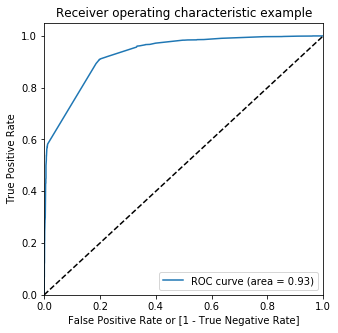

In [147]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

### Finding Optimal Cutoff Point

In [148]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead_Id,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.541854,3112,1,1,1,1,1,1,1,0,0,0,0
1,1,0.527262,8413,1,1,1,1,1,1,1,0,0,0,0
2,1,0.999876,2961,1,1,1,1,1,1,1,1,1,1,1
3,1,0.947176,24,1,1,1,1,1,1,1,1,1,1,1
4,0,0.011540,2740,0,1,0,0,0,0,0,0,0,0,0


In [149]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.388683  1.000000  0.000000
0.1   0.1  0.737477  0.973747  0.587253
0.2   0.2  0.780921  0.957041  0.668943
0.3   0.3  0.842919  0.909706  0.800455
0.4   0.4  0.843847  0.909706  0.801973
0.5   0.5  0.843537  0.907319  0.802984
0.6   0.6  0.828695  0.577168  0.988619
0.7   0.7  0.826840  0.571201  0.989378
0.8   0.8  0.814935  0.536595  0.991907
0.9   0.9  0.806741  0.513922  0.992919


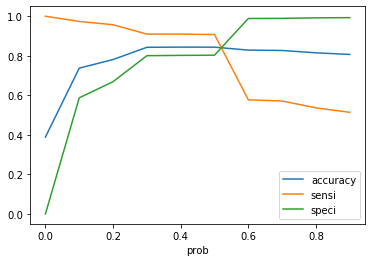

In [150]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

### The cutoff we have chosen i.e., 0.5 holds good and supported by the above graph

### Now calculating Precision and Recall
Precision tells us how accurate the model was in predicting the positive samples out of all the samples predicted to be positive. 
Recall tells us how accurately the model was able to identify the positive samples out of all positive samples that were actually present.

Here, we should prefer high recall as the positive leads identified correctly need to be approached with out wasting time on leads that are wrongly predicted as positive.

In [151]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3175,  779],
       [ 233, 2281]], dtype=int64)

In [152]:
precision=confusion[1,1]/(confusion[0,1]+confusion[1,1])
precision

0.7454248366013072

In [153]:
recall=confusion[1,1]/(confusion[1,0]+confusion[1,1])
recall

0.9073190135242641

# We can finalize on this model as the recall as well, is high along with the accuracy metric.

### Making predictions on the test set

In [154]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])


C:\Users\mvrao\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\mvrao\Anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [155]:
X_test=X_test[col]
X_test.head()

,Reference,Welingak Website,Email Bounced,Email Bounced,Working Professional,Busy,Closed by Horizzon,Interested in Next batch,Lateral student,Lost to EINS,...,in touch with EINS,switched off,Lateral Student,Other Leads,Potential Lead,Modified,Olark Chat Conversation,Olark Chat Conversation,Page Visited on Website,Page Visited on Website
567,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2303,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
1523,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6923,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7841,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [156]:
X_test_sm = sm.add_constant(X_test)

In [157]:
y_test_pred = res.predict(X_test_sm)

In [158]:
y_test_pred[:10]

567     0.011540
2303    0.024452
1523    0.014003
6923    0.541854
7841    0.014003
3036    0.003098
2427    0.928247
8667    0.527262
3245    0.541854
1805    0.541854
dtype: float64

In [159]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [160]:
y_pred_1.head()

,0
567,0.011540
2303,0.024452
1523,0.014003
6923,0.541854
7841,0.014003


In [161]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [162]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [163]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [164]:
y_pred_final.head()

,Converted,0
0,0,0.011540
1,0,0.024452
2,0,0.014003
3,0,0.541854
4,0,0.014003


In [165]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [166]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Converted,Converted_Prob
0,0,0.011540
1,0,0.024452
2,0,0.014003
3,0,0.541854
4,0,0.014003


In [167]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

In [168]:
y_pred_final['Lead_ID'] =y_pred_final.index 

In [169]:
y_pred_final.head()

,Converted,Converted_Prob,final_predicted,Lead_ID
0,0,0.011540,0,0
1,0,0.024452,0,1
2,0,0.014003,0,2
3,0,0.541854,1,3
4,0,0.014003,0,4


In [170]:
#Overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8520923520923521

In [171]:
confusion11 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion11

array([[1393,  332],
       [  78,  969]], dtype=int64)

In [172]:
TP = confusion11[1,1] # true positive 
TN = confusion11[0,0] # true negatives
FP = confusion11[0,1] # false positives
FN = confusion11[1,0] # false negatives

In [173]:
#Sensitivity
sensitivity=TP / float(TP+FN)
print(sensitivity)
#Specificity
specificity=TN / float(TN+FP)
print(specificity)

0.9255014326647565
0.807536231884058


In [174]:
precision=confusion11[1,1]/(confusion11[0,1]+confusion11[1,1])
precision

0.7448116833205227

In [175]:
recall=confusion11[1,1]/(confusion11[1,0]+confusion11[1,1])
recall

0.9255014326647565

In [176]:
y_pred_final.head()

,Converted,Converted_Prob,final_predicted,Lead_ID
0,0,0.011540,0,0
1,0,0.024452,0,1
2,0,0.014003,0,2
3,0,0.541854,1,3
4,0,0.014003,0,4


### The performance metrics with test data are also in line with the performance metrics of the training data. This can be selected as final model.

### Calculate Lead Score (Highest score indicates more chances of conversion)

In [195]:
#calculate lead Score
y_pred_final['LeadScore'] = y_pred_final.apply(lambda row: 0 if row['final_predicted'] ==0 else round(row['Converted_Prob']*100) , axis=1)
y_pred_final.head(20)

,Converted,Converted_Prob,final_predicted,Lead_ID,LeadScore
0,0,0.011540,0,0,0
1,0,0.024452,0,1,0
2,0,0.014003,0,2,0
3,0,0.541854,1,3,54
4,0,0.014003,0,4,0
5,0,0.003098,0,5,0
6,1,0.928247,1,6,93
7,0,0.527262,1,7,53
8,0,0.541854,1,8,54
9,1,0.541854,1,9,54
